In [5]:
# EDA_Churn.ipynb
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)



In [ ]:
# Charger le dataset
df = pd.read_csv('Data.csv')
df.head()

In [ ]:


# Aperçu structure
print("Dimensions :", df.shape)
print("\nTypes des colonnes :\n", df.dtypes)
print("\nStatistiques descriptives :\n", df.describe())
print("\nValeurs manquantes par colonne :\n", df.isnull().sum())


In [ ]:
# Analyse de la target
sns.countplot(x='Churn', data=df)
plt.title("Répartition du churn")
plt.show()
print("\nPourcentage de chaque classe :\n", df['Churn'].value_counts(normalize=True)*100)


In [ ]:

# Features numériques (exclure la target Churn)
numeric_features = [col for col in df.select_dtypes(include=['int64','float64']).columns if col != 'Churn']

# Histogrammes des variables numériques
df[numeric_features].hist(figsize=(12,10), bins=20)
plt.suptitle("Histogrammes des variables numériques")
plt.show()

# Boxplots pour détecter les outliers
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


In [ ]:
# Features catégorielles
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()



In [ ]:

# Corrélations
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations")
plt.show()


In [ ]:
# Sélection des colonnes numériques uniquement
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Heatmap de corrélations numériques
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations")
plt.show()

# Corrélations avec la target
if 'Churn' in numeric_features:
    corr_target = df[numeric_features].corr()['Churn'].sort_values(ascending=False)
    print("\nCorrélations des variables numériques avec la target Churn :\n", corr_target)
else:
    print("Attention : la variable cible 'Churn' n'est pas numérique et ne peut pas être incluse dans la corrélation.")


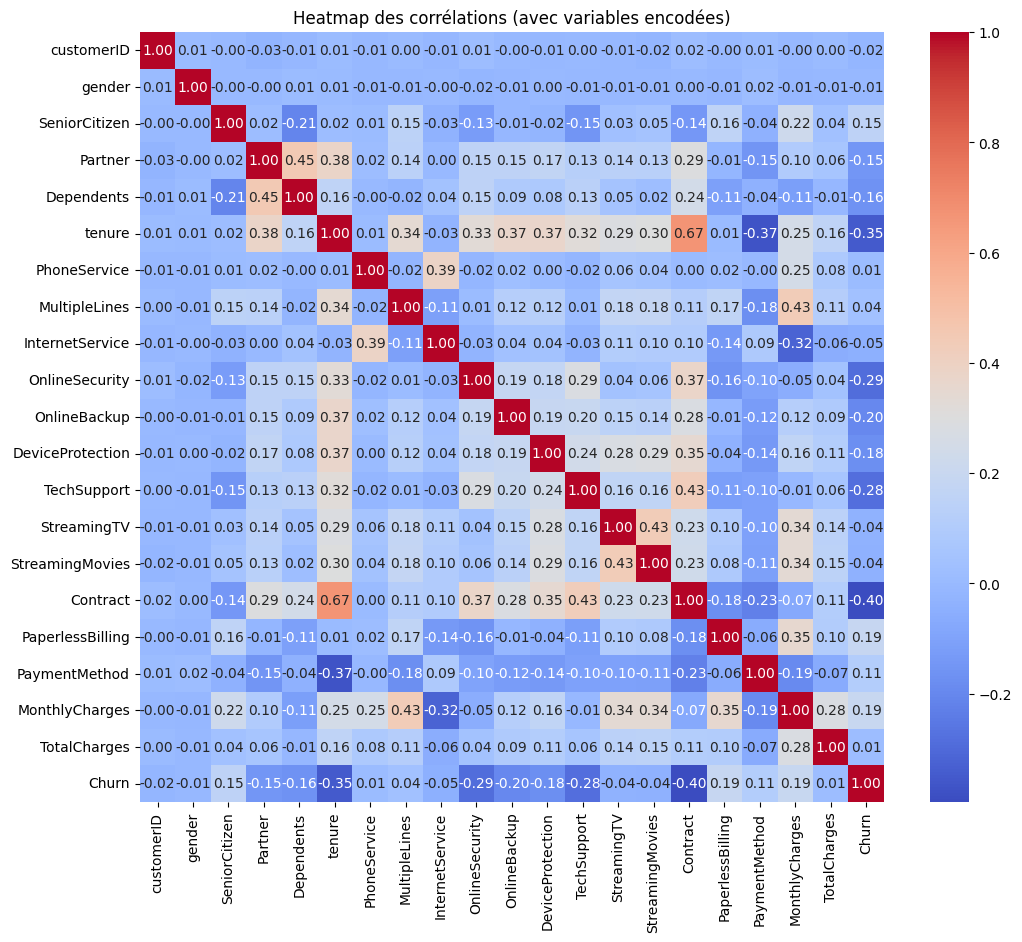


Corrélations des variables avec la target Churn :
 Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [ ]:
# Copier le dataframe pour ne pas toucher à l'original
df_encoded = df.copy()

# Encoder toutes les colonnes non numériques
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Maintenant toutes les colonnes sont numériques 
numeric_features = df_encoded.columns.tolist()

# Heatmap complète
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded[numeric_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations (avec variables encodées)")
plt.show()

# Corrélations avec la target
corr_target = df_encoded.corr()['Churn'].sort_values(ascending=False)
print("\nCorrélations des variables avec la target Churn :\n", corr_target)
